## **Lorenz 1963 Chaotic System**

 Il sistema di Lorenz è un sistema di equazioni differenziali ordinarie studiato per la prima volta dal matematico e meteorologo Edward Lorenz. 
 È degno di nota per avere soluzioni caotiche per determinati valori di parametri e condizioni iniziali. 
 In particolare, l' attrattore di Lorenz è un insieme di soluzioni caotiche del sistema di Lorenz. 
 Il termine " effetto farfalla " nei media popolari può derivare dalle implicazioni del mondo reale dell'attrattore di Lorenz, vale a dire che piccoli cambiamenti nelle condizioni iniziali evolvono in traiettorie completamente diverse.

 Nel 1963, Edward Lorenz ha sviluppato un modello matematico semplificato per la convezione atmosferica . Il modello è un sistema di tre equazioni differenziali ordinarie ora note come equazioni di Lorenz.

 ### **Simulazione**

 Questa simulazione ha come scopo la comparazione di diversi metodi di integrazione numerici e l'analisi del loro comportamento con sistemi caotici.

In [56]:
import numerical_integrator
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [57]:
sigma = 10
beta = 8/3
rho = 28

In [58]:
# x= [x, y, z]    state vector
# x_dot= [x_dot, y_dot, z_dot]    dx/dt vector => state derivative

def lorenz(x, t):
    return np.array([
        sigma * (x[1] - x[0]),
        x[0] * (rho - x[2]) - x[1],
        x[0] * x[1] - beta * x[2]
    ])

In [59]:
# Initial condition
x_0 = np.array([-8, 8, 27])

tf_s = 10   # t final step in second
dt = 0.004 # time step

t_s = np.arange(0, tf_s, dt)    #time step
nt_s = t_s.size                 #number of timestep

x_RK4 = np.empty((3, nt_s), dtype=float)
x_euler =  np.empty((3, nt_s), dtype=float)
x_trapezoidal  =  np.empty((3, nt_s), dtype=float)

x_RK4[:,0] = x_0
x_euler[:,0] = x_0
x_trapezoidal[:,0] = x_0

for i in range(0, nt_s - 1):
    x_RK4[:,i + 1] = numerical_integrator.RK4(lorenz, x_RK4[:,i], t_s[i], dt)
    x_euler[:,i + 1] = numerical_integrator.forward_euler(lorenz, x_euler[:,i], t_s[i], dt)
    x_trapezoidal[:,i + 1] = numerical_integrator.trapeziodal(lorenz, x_trapezoidal[:,i], t_s[i], dt)


error_euler = np.linalg.norm(x_euler - x_RK4, axis=0)  # errore nel tempo
error_trap = np.linalg.norm(x_trapezoidal - x_RK4, axis=0)

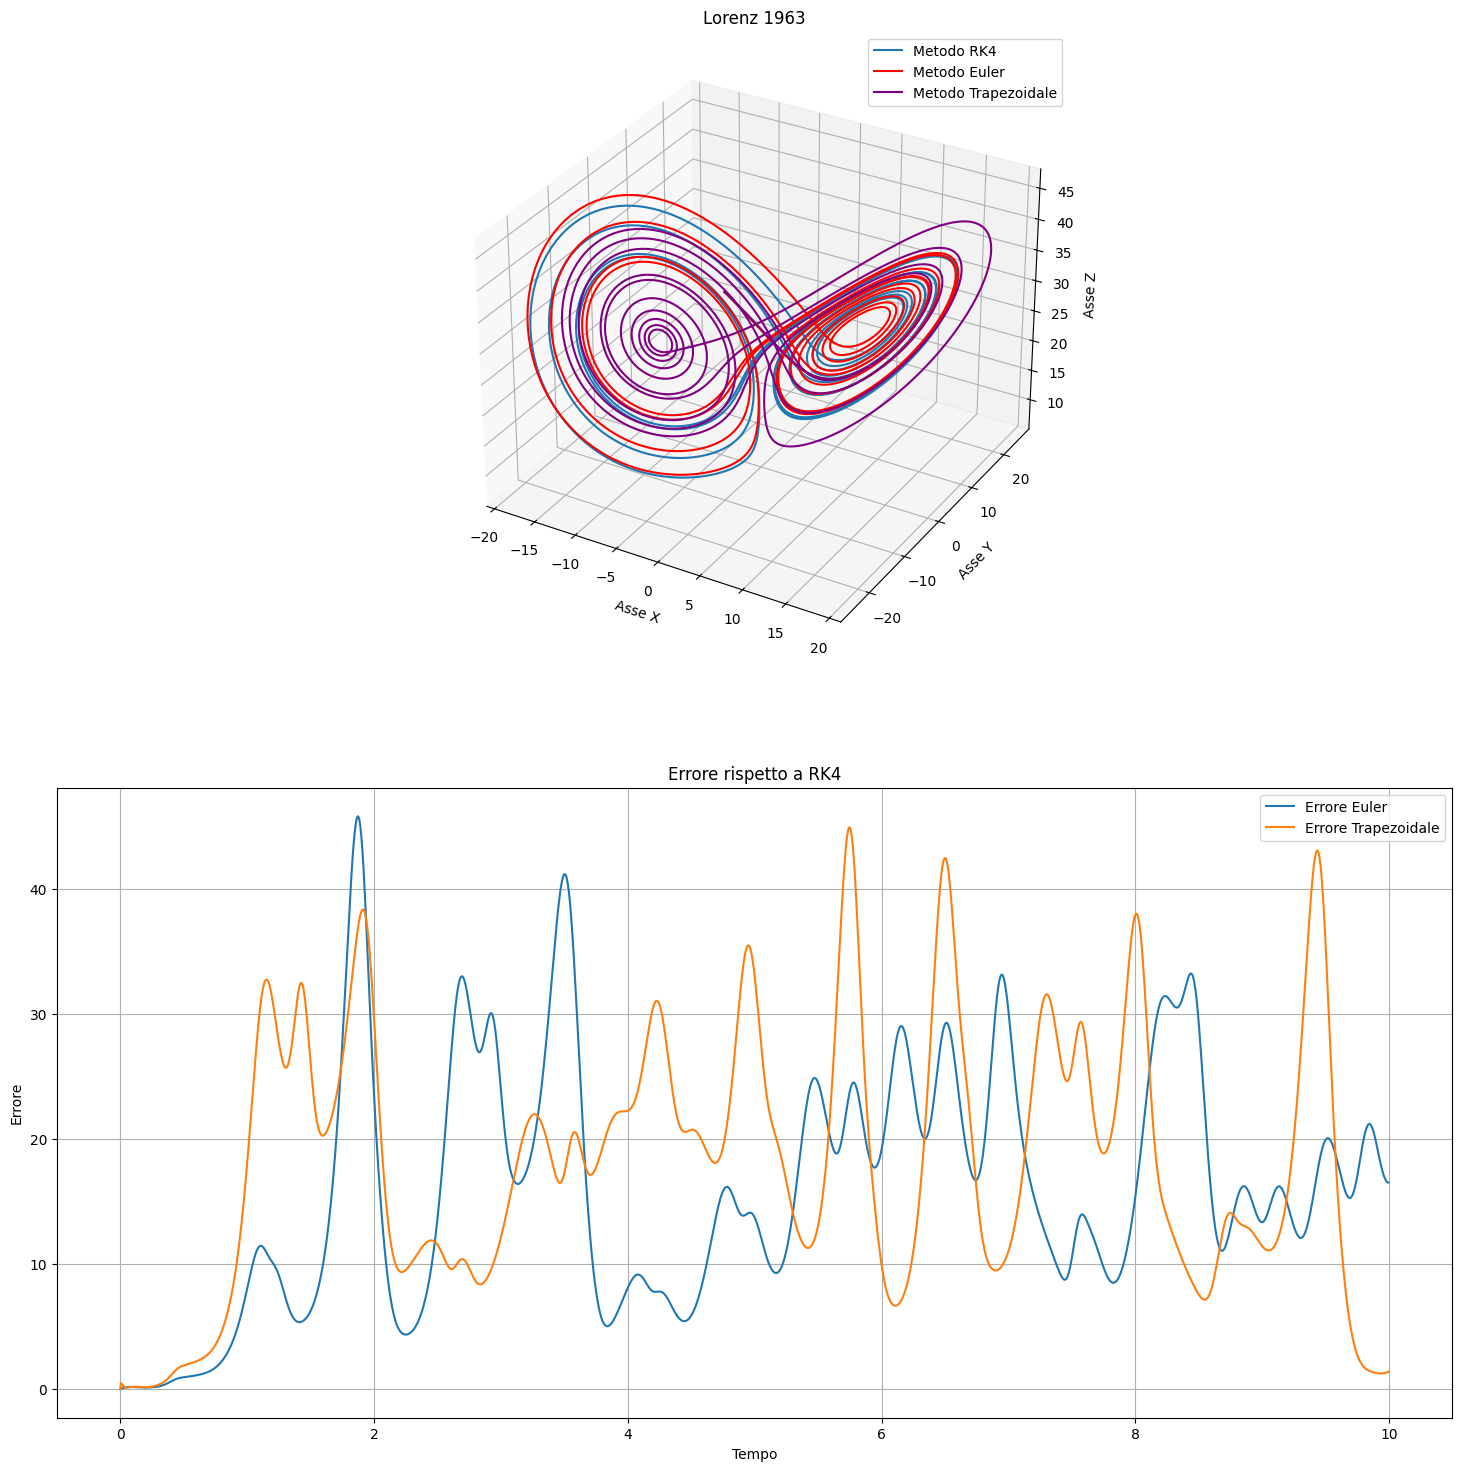

In [60]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(2,1,1, projection='3d')

ax.plot(x_RK4[0,:], x_RK4[1,:], x_RK4[2,:], label='Metodo RK4')
ax.plot(x_euler[0,:], x_euler[1,:], x_euler[2,:], c='red', label='Metodo Euler')
ax.plot(x_trapezoidal[0,:], x_trapezoidal[1,:], x_trapezoidal[2,:], c='purple', label='Metodo Trapezoidale')

ax.set_xlabel('Asse X')
ax.set_ylabel('Asse Y')
ax.set_zlabel('Asse Z')
ax.legend()
ax.set_title('Lorenz 1963')
ax.grid(True)

ax1 = fig.add_subplot(2,1,2)
ax1 = plt.plot(t_s, error_euler, label='Errore Euler')
ax1 = plt.plot(t_s, error_trap, label='Errore Trapezoidale')
ax1 = plt.xlabel('Tempo')
ax1 = plt.ylabel('Errore')
ax1 = plt.legend()
ax1 = plt.title('Errore rispetto a RK4')
ax1 = plt.grid()

plt.show()